<a href="https://colab.research.google.com/github/kluless13/paper/blob/main/yolo_nas_LF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvidia-smi

Sun Sep 17 11:57:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Installing YOLO-NAS

In [2]:
!pip install super_gradients
!pip install roboflow
!pip install supervision

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6.4/6.4 MB 57.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 135.8/135.8 kB 18.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 684.5/684.5 kB 53.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.9/2.9 MB 105.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.8/2.8 MB 105.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 408.6/408.6 kB 43.0 MB/s eta 0:00:00
     ‚îÅ‚

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 58.7/58.7 kB 1.8 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 155.3/155.3 kB 7.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 178.7/178.7 kB 21.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 58.8/58.8 kB 7.5 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 49.1/49.1 MB 22.4 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 67.8/67.8 kB 8.4 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [1]:
import torch

DEVICE = 'cuda' if torch.cuda.is_available() else "cpu"

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
%cd {HOME}

from roboflow import Roboflow
# Roboflow API

/content
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to lionfish-1 in yolov5pytorch:: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1922/1922 [00:00<00:00, 5614.33it/s]


In [5]:
LOCATION = dataset.location
print("location:", LOCATION)
CLASSES = sorted(project.classes.keys())
print("classes:", CLASSES)

location: /content/lionfish-1
classes: ['Lionfish']


### Fine Tuning

In [6]:
MODEL_ARCH = 'yolo_nas_l'
BATCH_SIZE = 8
MAX_EPOCHS = 25
CHECKPOINT_DIR = f'{HOME}/checkpoints'
EXPERIMENT_NAME = project.name.lower().replace(" ", "_")

In [7]:
from super_gradients.training import Trainer

trainer = Trainer(experiment_name=EXPERIMENT_NAME, ckpt_root_dir=CHECKPOINT_DIR)

[2023-09-17 11:58:03] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2023-09-17 11:58:03] WARNING - __init__.py - Failed to import pytorch_quantization


The console stream is logged into /root/sg_logs/console.log


[2023-09-17 11:58:08] INFO - utils.py - NumExpr defaulting to 8 threads.
Setuptools is replacing distutils.
[2023-09-17 11:58:11] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-09-17 11:58:11] WARNING - export.py - Failed to import pytorch_quantization
[2023-09-17 11:58:11] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization


In [8]:
dataset_params = {
    'data_dir': LOCATION,
    'train_images_dir':'train/images',
    'train_labels_dir':'train/labels',
    'val_images_dir':'valid/images',
    'val_labels_dir':'valid/labels',
    'test_images_dir':'test/images',
    'test_labels_dir':'test/labels',
    'classes': CLASSES
}

In [9]:
from super_gradients.training.dataloaders.dataloaders import (
    coco_detection_yolo_format_train, coco_detection_yolo_format_val)

train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

[2023-09-17 11:58:19] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 786/786 [00:00<00:00, 6722.64it/s]
[2023-09-17 11:58:19] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 112/112 [00:00<00:00, 6329.32it/s]
[2023-09-17 11:58:19] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 57/57 [00:00<00:00, 6069.29it/s]


In [10]:
train_data.dataset.transforms # Inspecting dataset

[DetectionMosaic('additional_samples_count': 3, 'non_empty_targets': False, 'prob': 1.0, 'input_dim': (640, 640), 'enable_mosaic': True, 'border_value': 114),
 DetectionRandomAffine('additional_samples_count': 0, 'non_empty_targets': False, 'degrees': 10.0, 'translate': 0.1, 'scale': [0.1, 2], 'shear': 2.0, 'target_size': (640, 640), 'enable': True, 'filter_box_candidates': True, 'wh_thr': 2, 'ar_thr': 20, 'area_thr': 0.1, 'border_value': 114),
 DetectionMixup('additional_samples_count': 1, 'non_empty_targets': True, 'input_dim': (640, 640), 'mixup_scale': [0.5, 1.5], 'prob': 1.0, 'enable_mixup': True, 'flip_prob': 0.5, 'border_value': 114),
 DetectionHSV('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 1.0, 'hgain': 5, 'sgain': 30, 'vgain': 30, 'bgr_channels': (0, 1, 2), '_additional_channels_warned': False),
 DetectionHorizontalFlip('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 0.5),
 DetectionPaddedRescale('additional_samples_count': 0, 'non_em

### Instantiate the model

In [11]:
from super_gradients.training import models

model = models.get(
    MODEL_ARCH,
    num_classes=len(dataset_params['classes']),
    pretrained_weights="coco"
)

[2023-09-17 11:58:31] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_l_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_l_coco.pth
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 256M/256M [00:00<00:00, 303MB/s]
[2023-09-17 11:58:33] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l


#### Defining the metrics and training parameters

In [12]:
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

train_params = {
    'silent_mode': False,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    "max_epochs": MAX_EPOCHS,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}

In [21]:
!tensorboard dev upload \
  --logdir {CHECKPOINT_DIR}/{EXPERIMENT_NAME} \
  --name "yolo NAS LF" \
  --description "yolo NAS metrics" \
  --one_shot

2023-09-17 12:50:50.604840: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/a7G9PpjbQ7OZ7fa4nK4UEA/

[2023-09-17T12:50:52] Started scanning logdir.
W0917 12:50:52.855619 134191755632640 uploader.py:794] Tensor (run:., tag:hyper_params/text_summary, step: 0) too large; skipping. Size 66095 exceeds limit of 16384 bytes.
[2023-09-17T12:50:53] Total uploaded: 913 scalars, 1 tensors (223 B), 0 binary objects
Total skipped: 1 tensors (64.5 kB)
[2023-09-17T12:50:53] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/a7G9PpjbQ7OZ7fa4nK4UEA/


### Training the model

In [17]:
trainer.train(
    model=model,
    training_params=train_params,
    train_loader=train_data,
    valid_loader=val_data
)

The console stream is now moved to /content/checkpoints/lionfish/console_Sep17_12_08_55.txt


[2023-09-17 12:08:55] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}
[2023-09-17 12:08:57] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (1 available on the machine)
    - Dataset size:                 786        (len(train_set))
    - Batch size per GPU:           8          (batch_size)
    - Batch Accumulate:             1          (batch_accumulate)
    - Total batch size:             8          (num_gpus * batch_size)
    - Effective Batch size:         8          (num_gpus * batch_size * batch_accumulate)
    - Iterations per epoch:         98         (len(train_loader))
    - Gradient updates per epoch:   98         (len(train_loader) / batch_accumulate)

[2023-09-17 12:08:57] INFO - sg_trainer.py - Started training for 25 epochs (0/24)

Validating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.71it/s]
[2023-09-17 12:10:10] INFO 

SUMMARY OF EPOCH 0
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.9237
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.3049
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.7737
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 3.5729
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 2.14
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2054
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.4616
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss = 3.3843
    ‚îú‚îÄ‚îÄ Precision@0.50 = 0.0
    ‚îú‚îÄ‚îÄ Recall@0.50 = 0.0
    ‚îú‚îÄ‚îÄ Map@0.50 = 0.0419
    ‚îî‚îÄ‚îÄ F1@0.50 = 0.0



Validating epoch 1: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.64it/s]
[2023-09-17 12:11:20] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/lionfish/ckpt_best.pth
[2023-09-17 12:11:20] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.5302457809448242


SUMMARY OF EPOCH 1
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.1796
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.9237 (‚Üò -0.7441)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.9237 (‚Üò -0.7441)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2371
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.3049 (‚Üò -0.0678)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.3049 (‚Üò -0.0678)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.5027
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.7737 (‚Üò -0.271)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.7737 (‚Üò -0.271)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 2.5238
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 3.5729 (‚Üò -1.0491)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 3.5729 (‚Üò -1.0491)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.8115
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 2.14   (‚Üò -0.3286)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 2.14   (‚Üò -0.3286)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.1787
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2054 (‚Üò -0.0267)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best unt

Validating epoch 2: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.60it/s]
[2023-09-17 12:12:28] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/lionfish/ckpt_best.pth
[2023-09-17 12:12:28] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.7304857969284058


SUMMARY OF EPOCH 2
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.071
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.1796 (‚Üò -0.1086)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.1796 (‚Üò -0.1086)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2353
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2371 (‚Üò -0.0019)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.2371 (‚Üò -0.0019)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.4628
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.5027 (‚Üò -0.0398)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.5027 (‚Üò -0.0398)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 2.3906
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 2.5238 (‚Üò -0.1332)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 2.5238 (‚Üò -0.1332)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.359
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.8115 (‚Üò -0.4525)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.8115 (‚Üò -0.4525)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.1795
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.1787 (‚Üó 0.0008)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best unti

Validating epoch 3: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.58it/s]


SUMMARY OF EPOCH 3
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.0576
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.071  (‚Üò -0.0134)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.071  (‚Üò -0.0134)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.232
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2353 (‚Üò -0.0033)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.2353 (‚Üò -0.0033)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.4645
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.4628 (‚Üó 0.0016)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.4628 (‚Üó 0.0016)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 2.3698
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 2.3906 (‚Üò -0.0208)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 2.3906 (‚Üò -0.0208)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.0786
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.359  (‚Üò -0.2804)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.359  (‚Üò -0.2804)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.1778
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.1795 (‚Üò -0.0017)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best unti

Validating epoch 4: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.52it/s]
[2023-09-17 12:14:54] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/lionfish/ckpt_best.pth
[2023-09-17 12:14:54] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8663686513900757


SUMMARY OF EPOCH 4
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.0269
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.0576 (‚Üò -0.0307)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.0576 (‚Üò -0.0307)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2271
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.232  (‚Üò -0.0049)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.232  (‚Üò -0.0049)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.4447
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.4645 (‚Üò -0.0198)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.4628 (‚Üò -0.0182)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 2.317
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 2.3698 (‚Üò -0.0528)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 2.3698 (‚Üò -0.0528)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.014
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.0786 (‚Üò -0.0646)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.0786 (‚Üò -0.0646)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.1626
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.1778 (‚Üò -0.0152)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best unt

Validating epoch 5: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.50it/s]


SUMMARY OF EPOCH 5
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.9896
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.0269 (‚Üò -0.0373)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.0269 (‚Üò -0.0373)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2193
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2271 (‚Üò -0.0078)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.2271 (‚Üò -0.0078)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.4139
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.4447 (‚Üò -0.0308)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.4447 (‚Üò -0.0308)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 2.2448
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 2.317  (‚Üò -0.0723)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 2.317  (‚Üò -0.0723)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.9787
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.014  (‚Üò -0.0353)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.014  (‚Üò -0.0353)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.1617
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.1626 (‚Üò -0.0009)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best u

Validating epoch 6: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.54it/s]


SUMMARY OF EPOCH 6
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.9599
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.9896 (‚Üò -0.0298)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.9896 (‚Üò -0.0298)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2068
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2193 (‚Üò -0.0125)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.2193 (‚Üò -0.0125)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.3582
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.4139 (‚Üò -0.0556)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.4139 (‚Üò -0.0556)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 2.156
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 2.2448 (‚Üò -0.0887)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 2.2448 (‚Üò -0.0887)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 1.0925
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.9787 (‚Üó 0.1138)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.9787 (‚Üó 0.1138)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.1556
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.1617 (‚Üò -0.0061)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best unti

Validating epoch 7: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.51it/s]
[2023-09-17 12:18:35] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/lionfish/ckpt_best.pth
[2023-09-17 12:18:35] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8789395689964294


SUMMARY OF EPOCH 7
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.9389
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.9599 (‚Üò -0.021)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.9599 (‚Üò -0.021)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2053
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2068 (‚Üò -0.0015)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.2068 (‚Üò -0.0015)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.3405
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.3582 (‚Üò -0.0177)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.3582 (‚Üò -0.0177)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 2.1224
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 2.156  (‚Üò -0.0336)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 2.156  (‚Üò -0.0336)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.9787
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.0925 (‚Üò -0.1138)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.9787 (‚Üò -0.0)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.1491
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.1556 (‚Üò -0.0065)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until 

Validating epoch 8: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.52it/s]
[2023-09-17 12:19:51] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/lionfish/ckpt_best.pth
[2023-09-17 12:19:51] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9023845195770264


SUMMARY OF EPOCH 8
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.9465
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.9389 (‚Üó 0.0077)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.9389 (‚Üó 0.0077)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.2059
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2053 (‚Üó 0.0005)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.2053 (‚Üó 0.0005)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.3407
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.3405 (‚Üó 1e-04)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.3405 (‚Üó 1e-04)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 2.1315
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 2.1224 (‚Üó 0.0091)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 2.1224 (‚Üó 0.0091)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.8985
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.9787 (‚Üò -0.0802)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.9787 (‚Üò -0.0802)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.151
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.1491 (‚Üó 0.0019)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0

Validating epoch 9: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.53it/s]
[2023-09-17 12:21:10] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/lionfish/ckpt_best.pth
[2023-09-17 12:21:10] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9260541200637817


SUMMARY OF EPOCH 9
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.8907
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.9465 (‚Üò -0.0558)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.9389 (‚Üò -0.0482)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.1996
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.2059 (‚Üò -0.0062)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.2053 (‚Üò -0.0057)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.2864
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.3407 (‚Üò -0.0543)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.3405 (‚Üò -0.0542)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 2.033
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 2.1315 (‚Üò -0.0986)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 2.1224 (‚Üò -0.0894)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.9691
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.8985 (‚Üó 0.0706)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.8985 (‚Üó 0.0706)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.1487
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.151  (‚Üò -0.0022)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best unti

Validating epoch 10: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.49it/s]


SUMMARY OF EPOCH 10
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.9302
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.8907 (‚Üó 0.0395)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.8907 (‚Üó 0.0395)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.1956
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.1996 (‚Üò -0.004)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.1996 (‚Üò -0.004)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.2947
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.2864 (‚Üó 0.0083)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.2864 (‚Üó 0.0083)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 2.0666
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 2.033  (‚Üó 0.0336)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 2.033  (‚Üó 0.0336)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.9345
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.9691 (‚Üò -0.0346)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.8985 (‚Üó 0.036)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.1467
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.1487 (‚Üò -0.0021)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now 

Validating epoch 11: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.51it/s]
[2023-09-17 12:23:50] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/lionfish/ckpt_best.pth
[2023-09-17 12:23:50] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9457991123199463


SUMMARY OF EPOCH 11
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.8816
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.9302 (‚Üò -0.0486)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.8907 (‚Üò -0.0091)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.1903
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.1956 (‚Üò -0.0053)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.1956 (‚Üò -0.0053)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.2826
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.2947 (‚Üò -0.0121)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.2864 (‚Üò -0.0037)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 1.9987
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 2.0666 (‚Üò -0.0679)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 2.033  (‚Üò -0.0342)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.9046
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.9345 (‚Üò -0.0299)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.8985 (‚Üó 0.0061)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.1395
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.1467 (‚Üò -0.0071)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best u

Validating epoch 12: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.49it/s]
[2023-09-17 12:25:11] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/lionfish/ckpt_best.pth
[2023-09-17 12:25:11] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9471615552902222


SUMMARY OF EPOCH 12
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.8723
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.8816 (‚Üò -0.0093)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.8816 (‚Üò -0.0093)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.19
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.1903 (‚Üò -0.0003)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.1903 (‚Üò -0.0003)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.2522
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.2826 (‚Üò -0.0304)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.2826 (‚Üò -0.0304)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 1.9734
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 1.9987 (‚Üò -0.0253)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 1.9987 (‚Üò -0.0253)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.9363
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.9046 (‚Üó 0.0316)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.8985 (‚Üó 0.0377)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.139
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.1395 (‚Üò -0.0006)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until

Validating epoch 13: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.50it/s]


SUMMARY OF EPOCH 13
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.8661
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.8723 (‚Üò -0.0062)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.8723 (‚Üò -0.0062)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.1868
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.19   (‚Üò -0.0032)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.19   (‚Üò -0.0032)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.2412
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.2522 (‚Üò -0.011)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.2522 (‚Üò -0.011)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 1.9537
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 1.9734 (‚Üò -0.0196)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 1.9734 (‚Üò -0.0196)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.8095
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.9363 (‚Üò -0.1267)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.8985 (‚Üò -0.089)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.1412
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.139  (‚Üó 0.0023)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best unti

Validating epoch 14: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.49it/s]


SUMMARY OF EPOCH 14
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.8395
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.8661 (‚Üò -0.0265)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.8661 (‚Üò -0.0265)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.1803
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.1868 (‚Üò -0.0066)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.1868 (‚Üò -0.0066)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.213
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.2412 (‚Üò -0.0282)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.2412 (‚Üò -0.0282)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 1.8967
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 1.9537 (‚Üò -0.057)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 1.9537 (‚Üò -0.057)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.8794
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.8095 (‚Üó 0.0699)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.8095 (‚Üó 0.0699)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.1368
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.1412 (‚Üò -0.0045)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until

Validating epoch 15: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.48it/s]


SUMMARY OF EPOCH 15
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.8344
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.8395 (‚Üò -0.0052)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.8395 (‚Üò -0.0052)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.18
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.1803 (‚Üò -0.0003)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.1803 (‚Üò -0.0003)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.1971
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.213  (‚Üò -0.0159)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.213  (‚Üò -0.0159)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 1.8828
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 1.8967 (‚Üò -0.0139)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 1.8967 (‚Üò -0.0139)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.8098
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.8794 (‚Üò -0.0696)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.8095 (‚Üó 0.0003)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.1423
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.1368 (‚Üó 0.0056)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best unti

Validating epoch 16: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.49it/s]


SUMMARY OF EPOCH 16
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.8199
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.8344 (‚Üò -0.0145)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.8344 (‚Üò -0.0145)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.1753
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.18   (‚Üò -0.0046)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.18   (‚Üò -0.0046)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.2008
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.1971 (‚Üó 0.0037)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.1971 (‚Üó 0.0037)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 1.8587
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 1.8828 (‚Üò -0.0242)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 1.8828 (‚Üò -0.0242)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.7995
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.8098 (‚Üò -0.0103)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.8095 (‚Üò -0.01)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.1471
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.1423 (‚Üó 0.0048)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until

Validating epoch 17: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.52it/s]
[2023-09-17 12:31:45] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/lionfish/ckpt_best.pth
[2023-09-17 12:31:45] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9638248085975647


SUMMARY OF EPOCH 17
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.8123
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.8199 (‚Üò -0.0076)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.8199 (‚Üò -0.0076)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.1747
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.1753 (‚Üò -0.0007)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.1753 (‚Üò -0.0007)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.1816
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.2008 (‚Üò -0.0192)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.1971 (‚Üò -0.0155)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 1.8398
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 1.8587 (‚Üò -0.0189)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 1.8587 (‚Üò -0.0189)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.7829
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.7995 (‚Üò -0.0167)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.7995 (‚Üò -0.0167)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.1218
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.1471 (‚Üò -0.0253)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best 

Validating epoch 18: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.51it/s]
[2023-09-17 12:33:07] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/lionfish/ckpt_best.pth
[2023-09-17 12:33:07] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9709453582763672


SUMMARY OF EPOCH 18
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.7946
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.8123 (‚Üò -0.0177)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.8123 (‚Üò -0.0177)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.17
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.1747 (‚Üò -0.0046)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.1747 (‚Üò -0.0046)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.1594
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.1816 (‚Üò -0.0221)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.1816 (‚Üò -0.0221)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 1.7995
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 1.8398 (‚Üò -0.0403)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 1.8398 (‚Üò -0.0403)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.8114
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.7829 (‚Üó 0.0285)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.7829 (‚Üó 0.0285)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.1298
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.1218 (‚Üó 0.0079)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until

Validating epoch 19: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.51it/s]


SUMMARY OF EPOCH 19
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.7986
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.7946 (‚Üó 0.004)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.7946 (‚Üó 0.004)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.1689
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.17   (‚Üò -0.0011)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.17   (‚Üò -0.0011)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.151
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.1594 (‚Üò -0.0085)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.1594 (‚Üò -0.0085)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 1.7964
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 1.7995 (‚Üò -0.0031)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 1.7995 (‚Üò -0.0031)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.8194
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.8114 (‚Üó 0.0081)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.7829 (‚Üó 0.0365)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.1357
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.1298 (‚Üó 0.0059)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until no

Validating epoch 20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.49it/s]
[2023-09-17 12:35:50] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/lionfish/ckpt_best.pth
[2023-09-17 12:35:50] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9794880151748657


SUMMARY OF EPOCH 20
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.7819
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.7986 (‚Üò -0.0167)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.7946 (‚Üò -0.0128)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.1669
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.1689 (‚Üò -0.002)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.1689 (‚Üò -0.002)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.1346
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.151  (‚Üò -0.0164)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.151  (‚Üò -0.0164)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 1.7664
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 1.7964 (‚Üò -0.03)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 1.7964 (‚Üò -0.03)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.7865
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.8194 (‚Üò -0.0329)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.7829 (‚Üó 0.0036)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.1376
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.1357 (‚Üó 0.0019)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until no

Validating epoch 21: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.51it/s]


SUMMARY OF EPOCH 21
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.7873
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.7819 (‚Üó 0.0055)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.7819 (‚Üó 0.0055)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.1604
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.1669 (‚Üò -0.0066)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.1669 (‚Üò -0.0066)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.118
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.1346 (‚Üò -0.0166)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.1346 (‚Üò -0.0166)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 1.7472
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 1.7664 (‚Üò -0.0192)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 1.7664 (‚Üò -0.0192)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.7636
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.7865 (‚Üò -0.0229)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.7829 (‚Üò -0.0193)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.1264
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.1376 (‚Üò -0.0111)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best unt

Validating epoch 22: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.50it/s]


SUMMARY OF EPOCH 22
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.7566
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.7873 (‚Üò -0.0308)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.7819 (‚Üò -0.0253)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.1606
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.1604 (‚Üó 0.0002)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.1604 (‚Üó 0.0002)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.1014
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.118  (‚Üò -0.0167)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.118  (‚Üò -0.0167)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 1.7087
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 1.7472 (‚Üò -0.0385)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 1.7472 (‚Üò -0.0385)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.7048
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.7636 (‚Üò -0.0587)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.7636 (‚Üò -0.0587)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.1206
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.1264 (‚Üò -0.0059)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best un

Validating epoch 23: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:06<00:00,  2.33it/s]


SUMMARY OF EPOCH 23
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.7524
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.7566 (‚Üò -0.0042)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.7566 (‚Üò -0.0042)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.1574
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.1606 (‚Üò -0.0032)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.1604 (‚Üò -0.003)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.0843
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.1014 (‚Üò -0.0171)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.1014 (‚Üò -0.0171)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 1.6879
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 1.7087 (‚Üò -0.0208)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 1.7087 (‚Üò -0.0208)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.858
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.7048 (‚Üó 0.1532)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.7048 (‚Üó 0.1532)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.1248
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.1206 (‚Üó 0.0042)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until

Validating epoch 24: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.50it/s]


SUMMARY OF EPOCH 24
‚îú‚îÄ‚îÄ Train
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.7596
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.7524 (‚Üó 0.0073)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.7524 (‚Üó 0.0073)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.1585
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.1574 (‚Üó 0.0011)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.1574 (‚Üó 0.0011)
‚îÇ   ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_dfl = 1.0975
‚îÇ   ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 1.0843 (‚Üó 0.0132)
‚îÇ   ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 1.0843 (‚Üó 0.0132)
‚îÇ   ‚îî‚îÄ‚îÄ Ppyoloeloss/loss = 1.7045
‚îÇ       ‚îú‚îÄ‚îÄ Epoch N-1      = 1.6879 (‚Üó 0.0166)
‚îÇ       ‚îî‚îÄ‚îÄ Best until now = 1.6879 (‚Üó 0.0166)
‚îî‚îÄ‚îÄ Validation
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_cls = 0.7278
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.858  (‚Üò -0.1302)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now = 0.7048 (‚Üó 0.023)
    ‚îú‚îÄ‚îÄ Ppyoloeloss/loss_iou = 0.1306
    ‚îÇ   ‚îú‚îÄ‚îÄ Epoch N-1      = 0.1248 (‚Üó 0.0058)
    ‚îÇ   ‚îî‚îÄ‚îÄ Best until now =

[2023-09-17 12:41:28] INFO - sg_trainer.py - RUNNING ADDITIONAL TEST ON THE AVERAGED MODEL...
Validating epoch 25: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14/14 [00:05<00:00,  2.54it/s]


### Zip and download fine-tuned model

In [19]:
# if you experience 'NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968' error, run code below üëá

import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [20]:
!zip -r yolo_nas.zip {CHECKPOINT_DIR}/{EXPERIMENT_NAME}

  adding: content/checkpoints/lionfish/ (stored 0%)
  adding: content/checkpoints/lionfish/events.out.tfevents.1694954494.bc362b56086b.3588.1 (deflated 42%)
  adding: content/checkpoints/lionfish/events.out.tfevents.1694952535.bc362b56086b.3588.0 (deflated 82%)
  adding: content/checkpoints/lionfish/logs_Sep17_12_08_55.txt (deflated 79%)
  adding: content/checkpoints/lionfish/experiment_logs_Sep17_12_08_55.txt (deflated 74%)
  adding: content/checkpoints/lionfish/console_Sep17_12_08_55.txt (deflated 94%)
  adding: content/checkpoints/lionfish/average_model.pth (deflated 8%)
  adding: content/checkpoints/lionfish/ckpt_best.pth (deflated 8%)
  adding: content/checkpoints/lionfish/ckpt_latest.pth

### Load trained model

In [22]:
best_model = models.get(
    MODEL_ARCH,
    num_classes=len(dataset_params['classes']),
    checkpoint_path=f"{CHECKPOINT_DIR}/{EXPERIMENT_NAME}/average_model.pth"
).to(DEVICE)

[2023-09-17 12:52:17] INFO - checkpoint_utils.py - Successfully loaded model weights from /content/checkpoints/lionfish/average_model.pth EMA checkpoint.


### Evaluate trained model

In [23]:
trainer.test(
    model=best_model,
    test_loader=test_data,
    test_metrics_list=DetectionMetrics_050(
        score_thres=0.1,
        top_k_predictions=300,
        num_cls=len(dataset_params['classes']),
        normalize_targets=True,
        post_prediction_callback=PPYoloEPostPredictionCallback(
            score_threshold=0.01,
            nms_top_k=1000,
            max_predictions=300,
            nms_threshold=0.7
        )
    )
)

Testing:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 6/7 [00:02<00:00,  2.58it/s]

{'PPYoloELoss/loss_cls': 0.7122957,
 'PPYoloELoss/loss_iou': 0.13161913,
 'PPYoloELoss/loss_dfl': 1.0148835,
 'PPYoloELoss/loss': 1.5487853,
 'Precision@0.50': 0.03673132508993149,
 'Recall@0.50': 1.0,
 'mAP@0.50': 0.9737823009490967,
 'F1@0.50': 0.0708598718047142}

Testing: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:03<00:00,  2.28it/s]


### Inference with trained model

In [24]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml",
    force_masks=False
)

CONFIDENCE_TRESHOLD = 0.5

predictions = {}

for image_name, image in ds.images.items():
    result = list(best_model.predict(image, conf=CONFIDENCE_TRESHOLD))[0]
    detections = sv.Detections(
        xyxy=result.prediction.bboxes_xyxy,
        confidence=result.prediction.confidence,
        class_id=result.prediction.labels.astype(int)
    )
    predictions[image_name] = detections

[2023-09-17 12:52:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-09-17 12:52:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-09-17 12:52:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-09-17 12:52:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-09-17 12:52:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-09-17 12:52:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-09-17 12:52:33] INFO -

### Visualise inference results

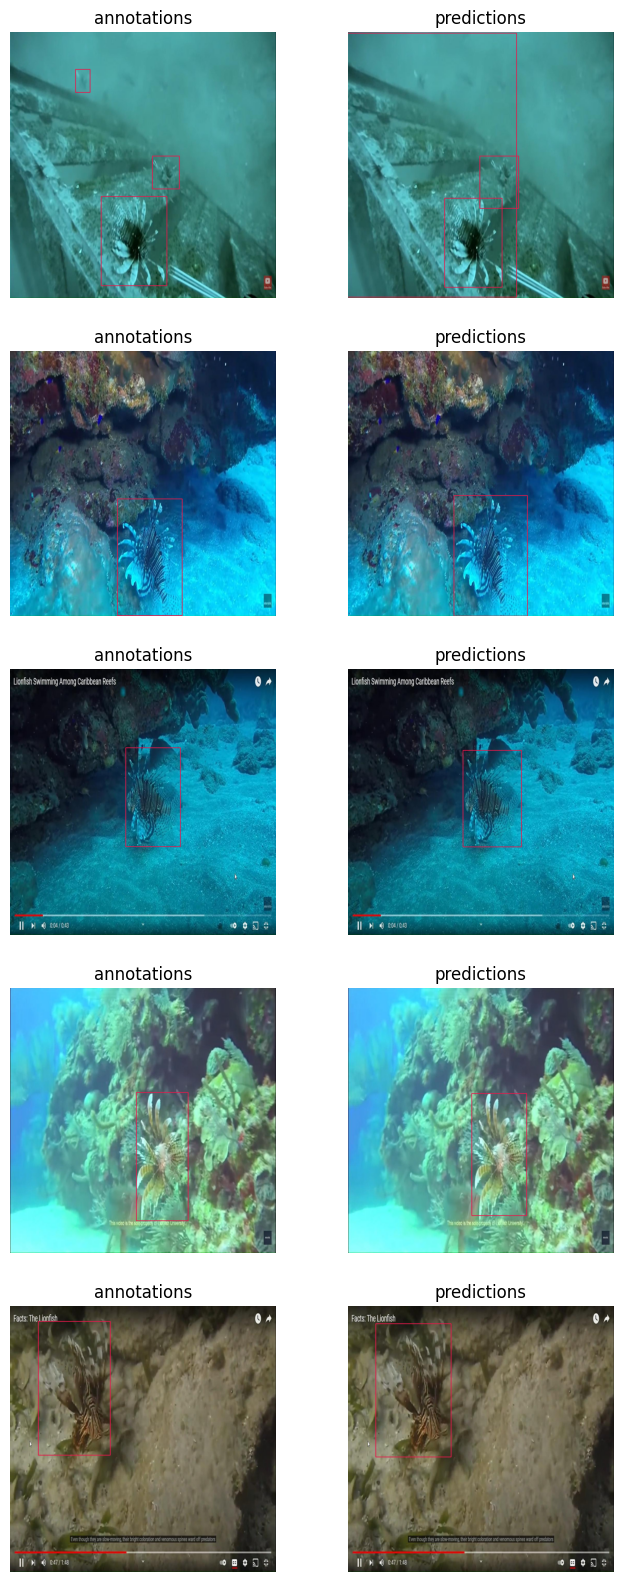

In [25]:
import random
random.seed(10)

import supervision as sv

MAX_IMAGE_COUNT = 5

n = min(MAX_IMAGE_COUNT, len(ds.images))

keys = list(ds.images.keys())
keys = random.sample(keys, n)

box_annotator = sv.BoxAnnotator()

images = []
titles = []

for key in keys:
    frame_with_annotations = box_annotator.annotate(
        scene=ds.images[key].copy(),
        detections=ds.annotations[key],
        skip_label=True
    )
    images.append(frame_with_annotations)
    titles.append('annotations')
    frame_with_predictions = box_annotator.annotate(
        scene=ds.images[key].copy(),
        detections=predictions[key],
        skip_label=True
    )
    images.append(frame_with_predictions)
    titles.append('predictions')

%matplotlib inline
sv.plot_images_grid(images=images, titles=titles, grid_size=(n, 2), size=(2 * 4, n * 4))

### Confusion matrix

In [26]:
!pip install onemetric

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 49.4/49.4 kB 4.0 MB/s eta 0:00:00


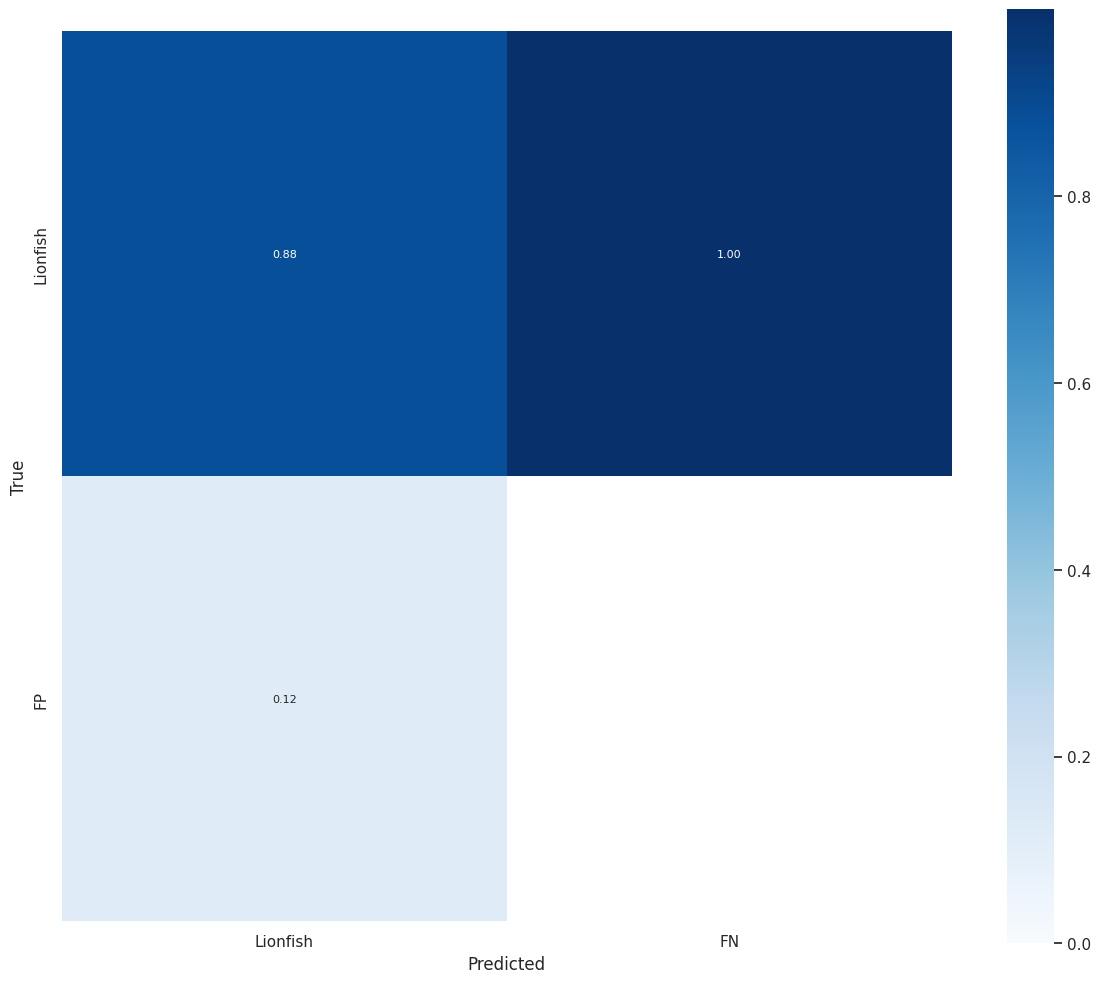

In [27]:
import os

import numpy as np

from onemetric.cv.object_detection import ConfusionMatrix

keys = list(ds.images.keys())

annotation_batches, prediction_batches = [], []

for key in keys:
    annotation=ds.annotations[key]
    annotation_batch = np.column_stack((
        annotation.xyxy,
        annotation.class_id
    ))
    annotation_batches.append(annotation_batch)

    prediction=predictions[key]
    prediction_batch = np.column_stack((
        prediction.xyxy,
        prediction.class_id,
        prediction.confidence
    ))
    prediction_batches.append(prediction_batch)

confusion_matrix = ConfusionMatrix.from_detections(
    true_batches=annotation_batches,
    detection_batches=prediction_batches,
    num_classes=len(ds.classes),
    conf_threshold=CONFIDENCE_TRESHOLD
)

confusion_matrix.plot(os.path.join(HOME, "confusion_matrix.png"), class_names=ds.classes)